<a href="https://colab.research.google.com/github/sarakhaderkoko1233-wq/ML-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.compose import ColumnTransformer

#download data
aisles=pd.read_csv('/content/aisles.csv')
departments=pd.read_csv('/content/departments.csv')
order_products__train=pd.read_csv('/content/order_products__train.csv')
order_products__prior=pd.read_csv('/content/order_products__prior.csv', on_bad_lines='skip')
products=pd.read_csv('/content/products.csv')
orders=pd.read_csv('/content/orders.csv',engine='python',on_bad_lines='skip')

In [4]:
#departments
print("head:",departments.head())
print("info:",departments.info())
print("discribe:",departments.describe())
print("sum os nulls:",departments.isnull().sum())
print("is it duplicated?",departments.duplicated().any())
print("-----------------------------------")
#order product train
print("head:", order_products__train.head())
print("info:", order_products__train.info())
print("discribe:", order_products__train.describe())
print("sum of nulls:", order_products__train.isnull().sum())
print("is it duplicated?", order_products__train.duplicated().any())
print("-----------------------------------")
#products
print("head:", products.head())
print("info:",products.info())
print("discribe:", products.describe())
print("sum of nulls:", products.isnull().sum())
print("is it duplicated?",products.duplicated().any())
print("-----------------------------------")
#orders
print("head:", orders.head())
print("info:", orders.info())
print("discribe:",orders.describe())
print("is it null?",orders.isnull().sum())
#aisles
print("head:", aisles.head())
print("info:", aisles.info())
print("discribe:", aisles.describe())
print("is it null?", aisles.isnull().sum())





head:    department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
info: None
discribe:        department_id
count      21.000000
mean       11.000000
std         6.204837
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        21.000000
sum os nulls: department_id    0
department       0
dtype: int64
is it duplicated? False
-----------------------------------
head:    order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2      

In [5]:
#merging
df=order_products__train.merge(orders,on='order_id',how='left')
df=df.merge(products,on='product_id',how='left')
df=df.merge(departments,on='department_id',how='left')
df=df.merge(aisles,on='aisle_id',how='left')
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   product_id              1384617 non-null  int64  
 2   add_to_cart_order       1384617 non-null  int64  
 3   reordered               1384617 non-null  int64  
 4   user_id                 1384617 non-null  int64  
 5   eval_set                1384617 non-null  object 
 6   order_number            1384617 non-null  int64  
 7   order_dow               1384617 non-null  int64  
 8   order_hour_of_day       1384617 non-null  int64  
 9   days_since_prior_order  1384617 non-null  float64
 10  product_name            1384617 non-null  object 
 11  aisle_id                1384617 non-null  int64  
 12  department_id           1384617 non-null  int64  
 13  department              1384617 non-null  object 
 14  ai

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0


In [6]:
df['days_since_prior_order'].isnull().sum()

np.int64(0)

In [7]:

num_col=['add_to_cart_order','days_since_prior_order','order_number','order_dow','order_hour_of_day']
num_imputer=SimpleImputer(strategy='median')
df[num_col]=num_imputer.fit_transform(df[num_col])

df['eval_set']=df['eval_set'].fillna('missing')
df['aisle']=df['aisle'].fillna('missing')
df['department']=df['department'].fillna('missing')


df.isnull().sum()

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0


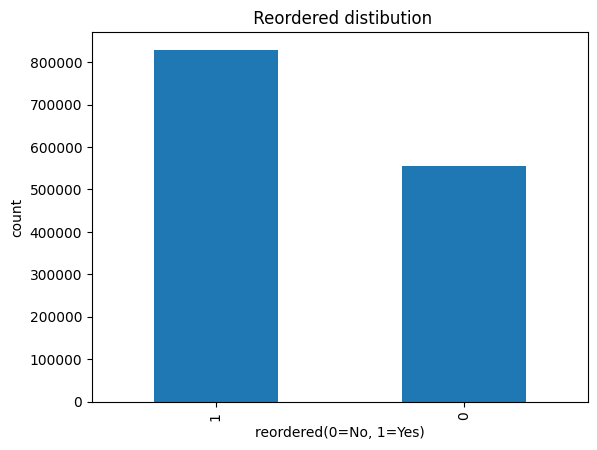

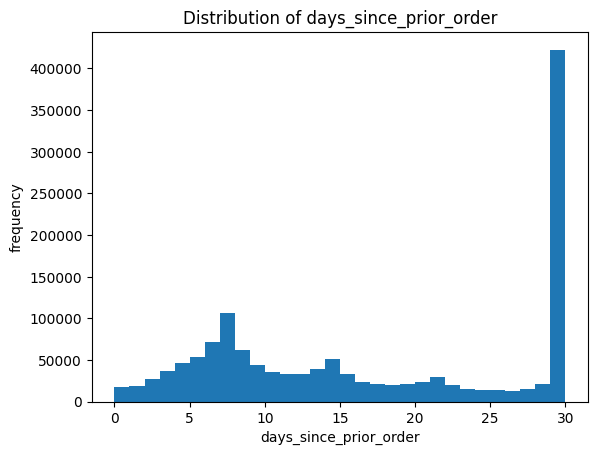

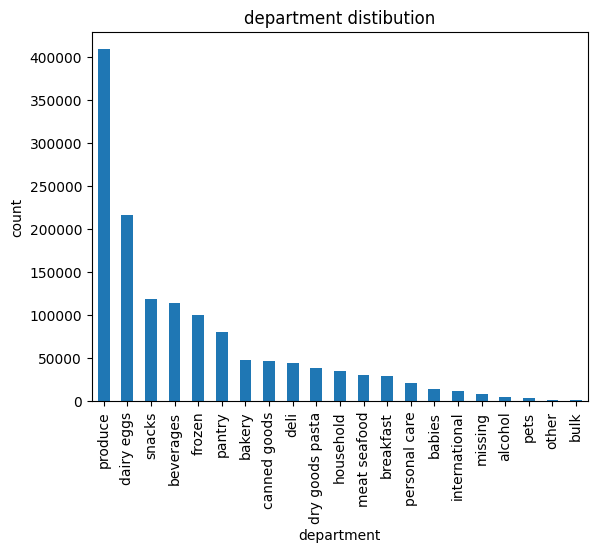

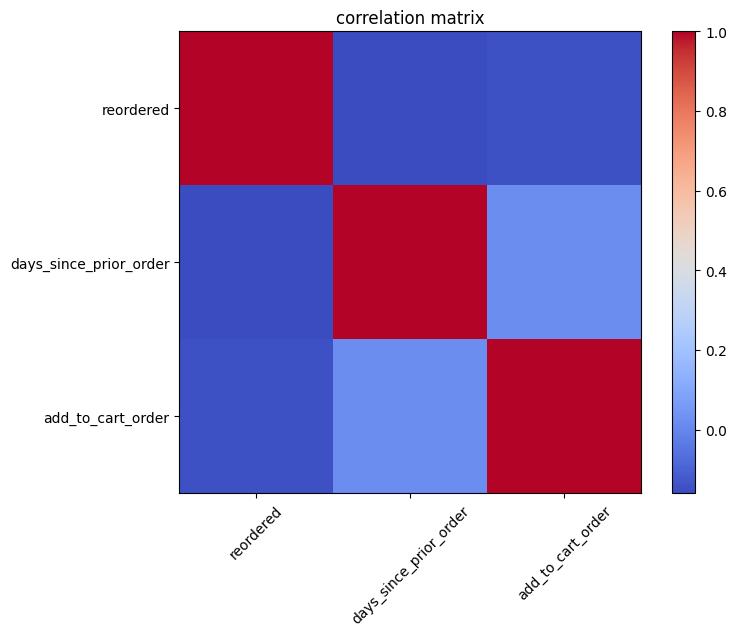

In [8]:
df['reordered'].value_counts().plot(kind='bar')
plt.xlabel('reordered(0=No, 1=Yes)')
plt.ylabel('count')
plt.title(' Reordered distibution')
plt.show()

plt.hist(df['days_since_prior_order'],bins=30)
plt.xlabel('days_since_prior_order')
plt.ylabel('frequency')
plt.title('Distribution of days_since_prior_order')
plt.show()

df['department'].value_counts().plot(kind='bar')
plt.xlabel('department')
plt.ylabel('count')
plt.title('department distibution')
plt.show()

corr=df[['reordered','days_since_prior_order','add_to_cart_order']].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr,cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)),corr.columns,rotation=45)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.title('correlation matrix')
plt.show()

In [9]:
user_order=df.groupby('user_id').agg(user_order_count=('order_id','nunique')).reset_index()
user_items=df.groupby('user_id').agg(total_item_count=('product_id','nunique')).reset_index()
user_recorded=df[df['reordered']==1].groupby('user_id').agg(recorded_items_count=('reordered','sum')).reset_index()

user_features=user_order.merge(user_items,on='user_id',how='left')
user_features=user_features.merge(user_recorded,on='user_id',how='left')
user_features['recorded_items_count'] = user_features['recorded_items_count'].fillna(0)

user_features['basket_size']=user_features['total_item_count']/user_features['user_order_count']
user_features['reorder_rate']=user_features['recorded_items_count']/user_features['total_item_count']
user_features = user_features.fillna(0)

df['user_id']=df['user_id'].astype(int)
user_features['user_id']=user_features['user_id'].astype(int)

df=df.merge(user_features[['user_id','user_order_count','basket_size','reorder_rate']],on='user_id',how='left')
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle,user_order_count,basket_size,reorder_rate
0,1,49302,1.0,1,112108,train,4.0,4.0,10.0,9.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt,1,8.0,0.5
1,1,11109,2.0,1,112108,train,4.0,4.0,10.0,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,other creams cheeses,1,8.0,0.5
2,1,10246,3.0,0,112108,train,4.0,4.0,10.0,9.0,Organic Celery Hearts,83,4,produce,fresh vegetables,1,8.0,0.5
3,1,49683,4.0,0,112108,train,4.0,4.0,10.0,9.0,Cucumber Kirby,83,4,produce,fresh vegetables,1,8.0,0.5
4,1,43633,5.0,1,112108,train,4.0,4.0,10.0,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,canned meat seafood,1,8.0,0.5


In [10]:

df_encoded = pd.get_dummies(df, columns=['aisle'])
df_encoded.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
0,1,49302,1.0,1,112108,train,4.0,4.0,10.0,9.0,...,False,False,False,False,False,False,False,False,False,True
1,1,11109,2.0,1,112108,train,4.0,4.0,10.0,9.0,...,False,False,False,False,False,False,False,False,False,False
2,1,10246,3.0,0,112108,train,4.0,4.0,10.0,9.0,...,False,False,False,False,False,False,False,False,False,False
3,1,49683,4.0,0,112108,train,4.0,4.0,10.0,9.0,...,False,False,False,False,False,False,False,False,False,False
4,1,43633,5.0,1,112108,train,4.0,4.0,10.0,9.0,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df_encoded.dtypes

,0
order_id,int64
product_id,int64
add_to_cart_order,float64
reordered,int64
user_id,int64
...,...
aisle_trash bags liners,bool
aisle_vitamins supplements,bool
aisle_water seltzer sparkling water,bool
aisle_white wines,bool


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [13]:

X=df_encoded.drop(columns=['reordered', 'order_id','user_id','product_id','product_name','department','eval_set'], errors='ignore')
y=df_encoded['reordered']

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, stratify=y, random_state=42)

In [15]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [16]:

c=1
model=LogisticRegression(C=c,penalty='l2',solver='lbfgs',class_weight='balanced',max_iter=2000)
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"train Accuracy: {model.score(X_train_scaled,y_train)}")
print(f"\nconfusion_matrix: {confusion_matrix(y_test,y_pred)}")

plt.scatter(X_test_scaled,y_test,label='actual',color='red')
plt.plot(X_test_scaled,y_pred,label='predicted',color='blue')
plt.xlabel('featured(scaled)')
plt.ylabel('Reordered')
plt.title('Logistic Regression(l1)')
plt.legend()
plt.show()

Test Accuracy: 0.7787299042336525
train Accuracy: 0.7780422915013456

confusion_matrix: [[ 86304  24855]
 [ 36420 129345]]


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)
y_pred=knn.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"train Accuracy: {knn.score(X_train_scaled,y_train)}")
print(f"\nconfusion_matrix: {confusion_matrix(y_test,y_pred)}")